In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from models import WeightedLasso
from utils.ode import lorenz, hydrogen_bromine, hydrogen_bromine_init, map_equation, rober, rober_init

from scipy.integrate import solve_ivp

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
dt = 0.01
x0_train = rober_init
t_train = np.arange(0, 1e2, dt)
t_train_span = (t_train[0], t_train[-1])

data = solve_ivp(
    rober,
    t_train_span,
    x0_train,
    method='LSODA',
    rtol=1e-6,
    t_eval=t_train,
)

X = data.y.T

print("Generated X shape:", X.shape)
print("t_train shape:", t_train.shape)

Generated X shape: (10000, 3)
t_train shape: (10000,)


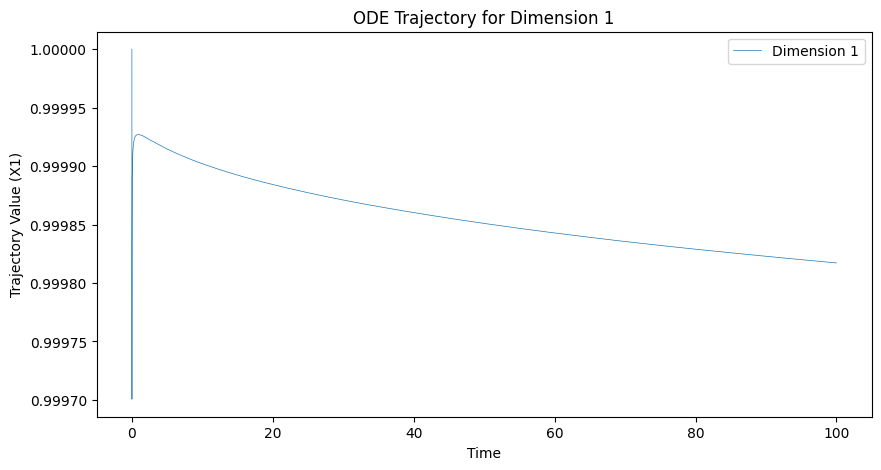

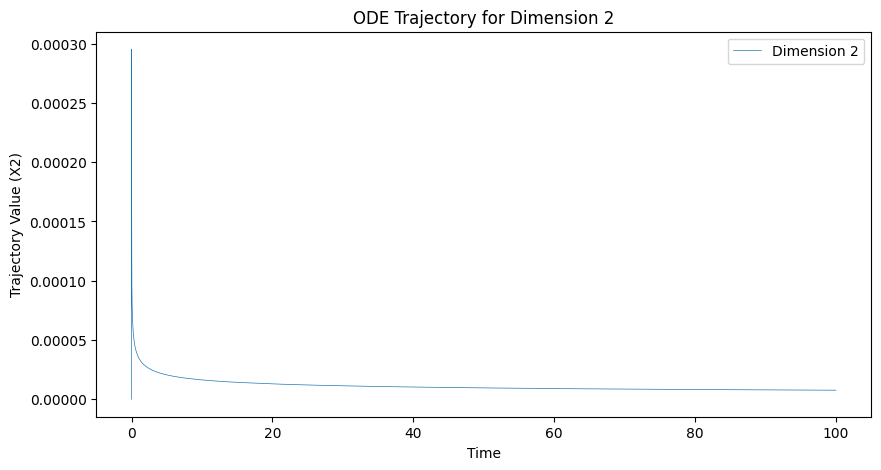

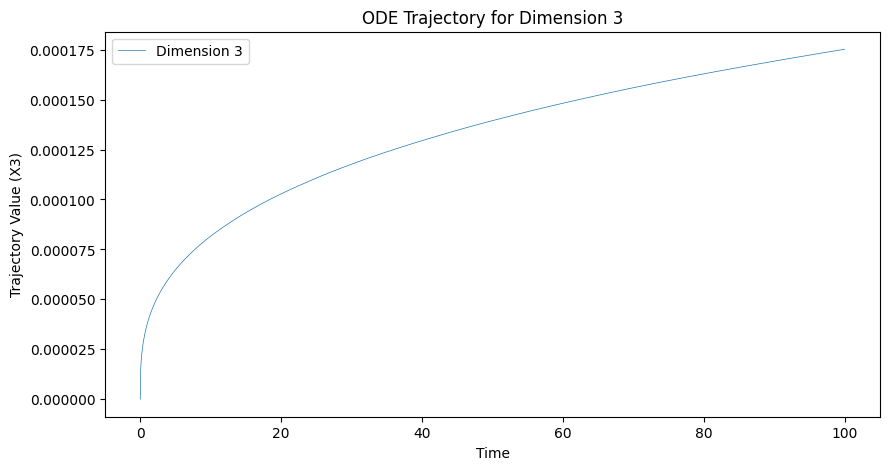

In [78]:
import matplotlib.pyplot as plt

for i in range(X.shape[1]):
    plt.figure(figsize=(10, 5))
    # plt.plot(t_train, X[:, i], label=f"Dimension {i+1}", lw=0.5)
    plt.plot(data.t, X[:, i], label=f"Dimension {i+1}", lw=0.5)
    plt.xlabel("Time")
    plt.ylabel(f"Trajectory Value (X{i+1})")
    plt.title(f"ODE Trajectory for Dimension {i+1}")
    plt.legend()
    plt.show()

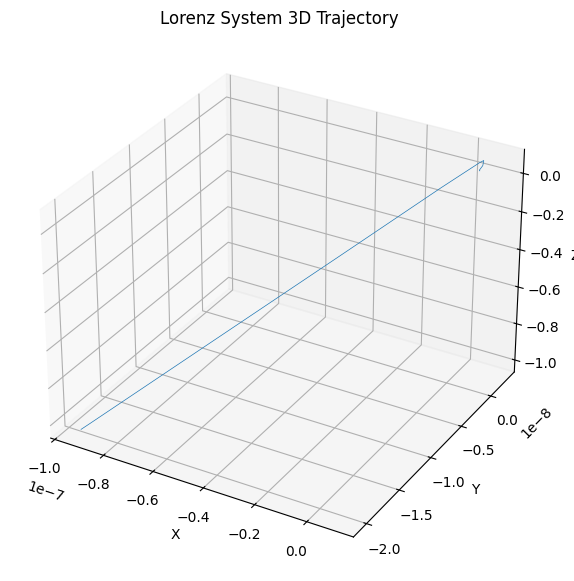

In [3]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,0], X[:,1], X[:,2], lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz System 3D Trajectory")
plt.show()

In [4]:
library = ps.PolynomialLibrary(degree=3)
library.fit(X)
model = ps.SINDy(
    feature_library=library,
    optimizer=WeightedLasso(alpha=1e-4, weights=np.ones((library.size, 6)), max_iter=10000),
    differentiation_method=ps.FiniteDifference(),
)


model.fit(x=X, t=t_train)
model.print()

/nix/store/05hc8lih2w5gqw4kdk719y734w77rvz4-weight-perturbation-dev-env/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:241: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


(x0)' = 0.000
(x1)' = 0.000
(x2)' = 0.000
(x3)' = 0.000
(x4)' = 0.000
(x5)' = 0.000


IndexError: list index out of range

In [ ]:
print(ps.__version__)

In [6]:
library.n_output_features_

84

In [ ]:
model.coefficients()

In [ ]:
true_coef = map_equation(hydrogen_bromine, library)
pred_coef = model.coefficients()

plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.imshow(true_coef, cmap='viridis', aspect='auto')
plt.title("True Coefficients")
plt.subplot(3, 1, 2)
plt.imshow(pred_coef, cmap='viridis', aspect='auto')
plt.title("Predicted Coefficients")
plt.subplot(3, 1, 3)
plt.imshow(np.abs(true_coef - pred_coef), cmap='viridis', aspect='auto')
plt.title("Absolute Error")
plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
for row in range(true_coef.shape[0]):
    plt.scatter(
        np.arange(true_coef.shape[1]),
        true_coef[row, :],
        label=f"True Coefficients Row {row}",
        alpha=0.5,
    )

plt.yscale('symlog')
plt.show()